In [1]:
import cv2
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray, deltaE_cie76, rgb2lab
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter 
import os
import webcolors

In [2]:
image = cv2.imread('maryland_test_50.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [39]:
def plot_rois(image):
    image_gray = rgb2gray(image)
    # Compute radii in the 3rd column.
    blobs_dog = blob_dog(image_gray, max_sigma=10, threshold=.25)
    print(blobs_dog)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_list = [blobs_dog]
    colors = ['lime']
    titles = [ 'Difference of Gaussian']
    sequence = zip(blobs_list, colors, titles)
    fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()
    for idx, (blobs, color, title) in enumerate(sequence):
        ax[idx].set_title(title)
        ax[idx].imshow(image)
        for blob in blobs:
            y, x, r = blob
            c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
            ax[idx].add_patch(c)
        ax[idx].set_axis_off()
    plt.tight_layout()
    plt.show()
def find_rois(image, margin = 12):
    image_gray = rgb2gray(image)
    blobs_dog = blob_dog(image_gray, max_sigma=16.4, threshold=.14)
    coordinates = blobs_dog.tolist()
    filtered_coordinates = (list(filter(lambda lst: lst[2] > 5, coordinates)))
    img_lst = [image[int(lst[0] - margin):int(lst[0] + margin), int(lst[1] - margin):int(lst[1] + margin)] for lst in filtered_coordinates]
    return img_lst
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
def get_colors(img, number_of_colors):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = [list(map(int, lst)) for lst in clf.cluster_centers_]
    ordered_colors = [center_colors[i] for i in counts.keys()]
    return center_colors


23


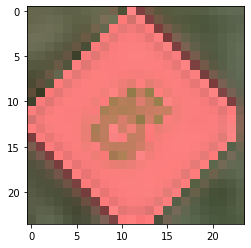

In [40]:
img_list = find_rois(image)
print(len(img_list))
plt.imshow(img_list[1])

In [38]:
a = get_colors(img_list[1], 2)
print(a)

[[79, 80, 59], [101, 101, 80]]
